# Proyecto IA, Predicr el impacto de redes sociales en la salud mental, Versión con modelo de ML con regresion lineal. #

## 1. Requerimientos:
- **Dataset**: mental_health_and_technology_usage_2024.csv
- **Librerías**: pandas, numpy, matplotlib, seaborn...

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 2. Cargar el Dataset

In [7]:
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')
print(df.head())
print(df.info())

      User_ID  Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0  USER-00001   23  Female                    6.57                      6.00   
1  USER-00002   21    Male                    3.01                      2.57   
2  USER-00003   51    Male                    3.04                      6.14   
3  USER-00004   25  Female                    3.84                      4.48   
4  USER-00005   53    Male                    1.20                      0.56   

   Gaming_Hours  Screen_Time_Hours Mental_Health_Status Stress_Level  \
0          0.68              12.36                 Good          Low   
1          3.74               7.61                 Poor         High   
2          1.26               3.16                 Fair         High   
3          2.59              13.08            Excellent       Medium   
4          0.29              12.63                 Good          Low   

   Sleep_Hours  Physical_Activity_Hours Support_Systems_Access  \
0         8.01      

## 3. Exploración Inicial de los Datos
Revisamos la estructura general del dataset, sus columnas, y verificamos si hay datos faltantes.

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

Age  Technology_Usage_Hours  Social_Media_Usage_Hours  \
count  10000.000000            10000.000000              10000.000000   
mean      41.518600                6.474341                  3.972321   
std       13.920217                3.169022                  2.313707   
min       18.000000                1.000000                  0.000000   
25%       29.000000                3.760000                  1.980000   
50%       42.000000                6.425000                  3.950000   
75%       54.000000                9.212500                  5.990000   
max       65.000000               12.000000                  8.000000   

       Gaming_Hours  Screen_Time_Hours   Sleep_Hours  Physical_Activity_Hours  
count  10000.000000       10000.000000  10000.000000             10000.000000  
mean       2.515598           7.975765      6.500724                 5.003860  
std        1.446748           4.042608      1.450933                 2.905044  
min        0.000000           1.000000      4.000000                 0.000000  
25%        1.260000           4.520000      5.260000                 2.490000  
50%        2.520000           7.900000      6.500000                 4.990000  
75%        3.790000          11.500000      7.760000                 7.540000  
max        5.000000          15.000000      9.000000                10.000000

In [10]:
df.isnull().sum()

User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64

## 4. Análisis Exploratorio de Datos (EDA)
A continuación, generaremos visualizaciones para comprender mejor la distribución de los datos.

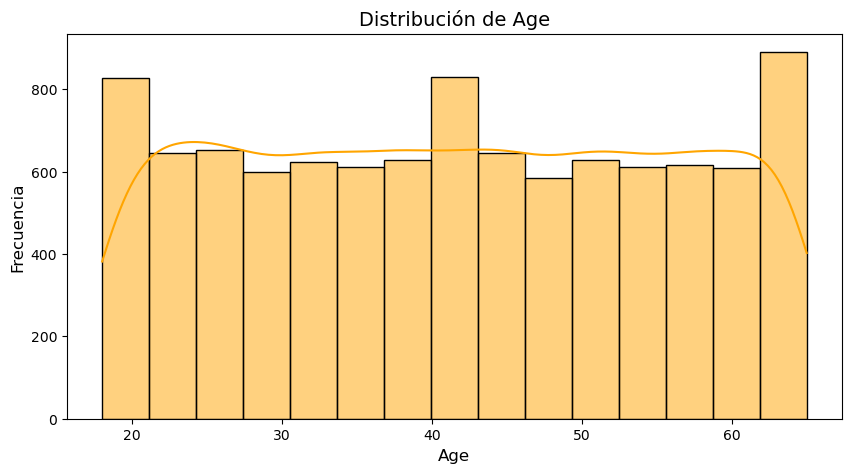

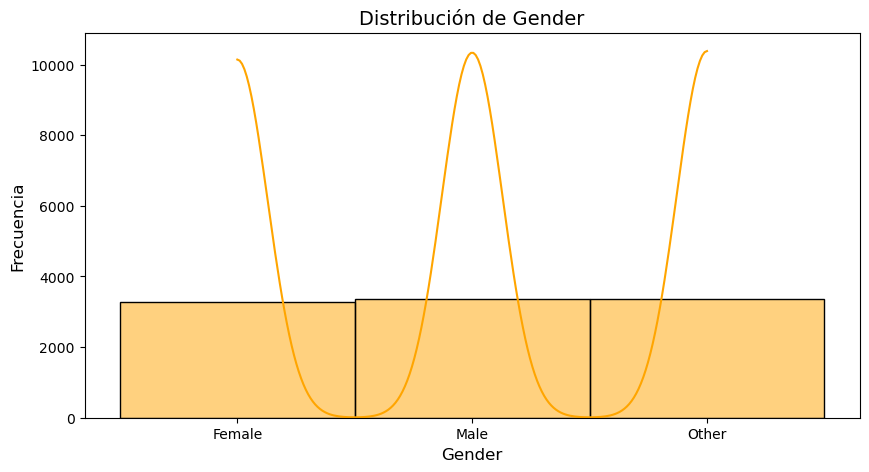

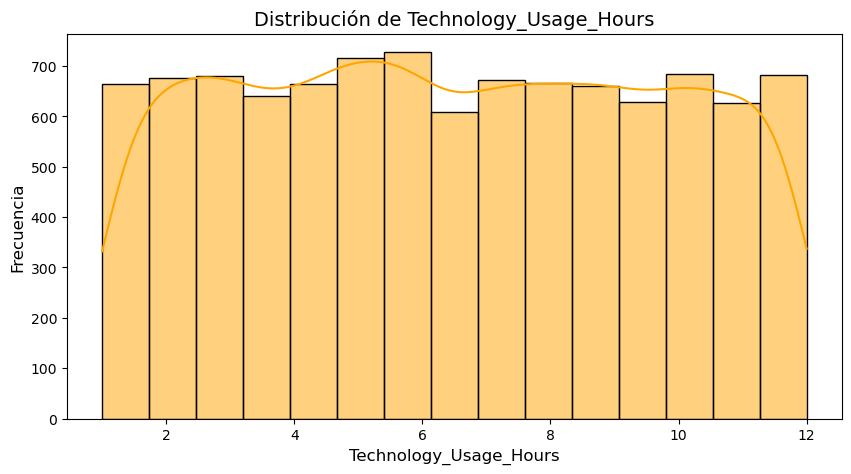

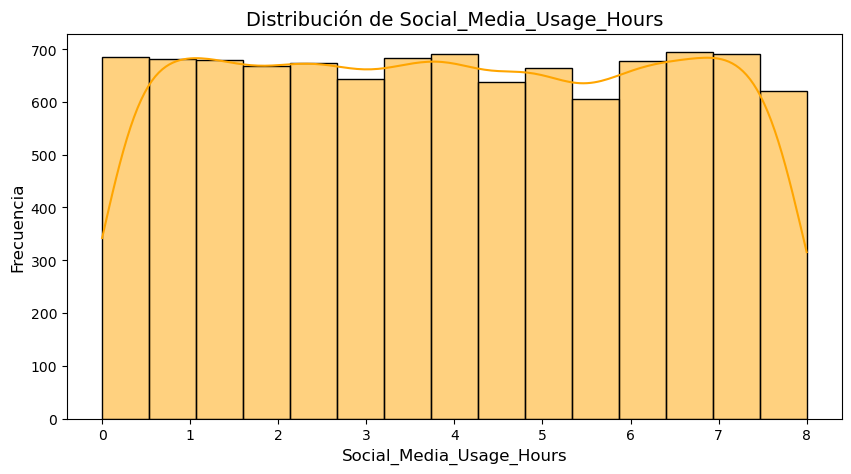

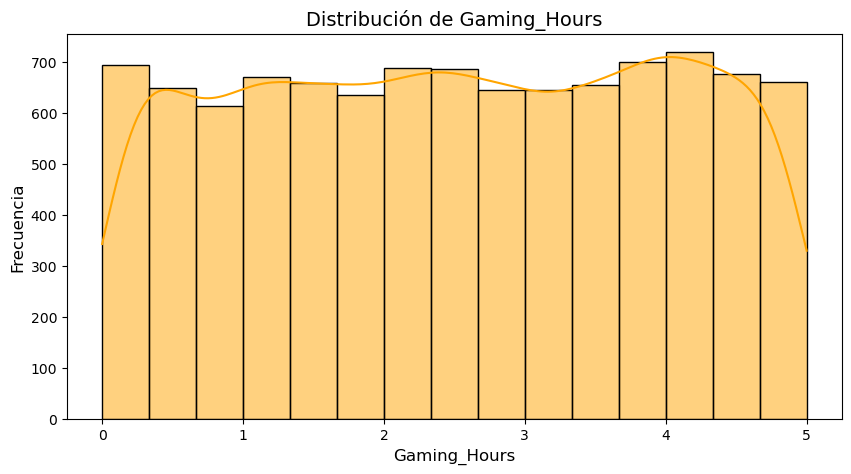

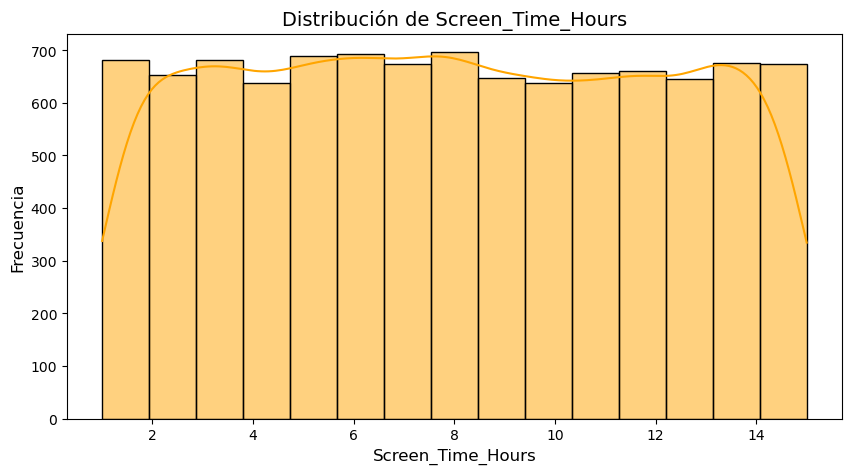

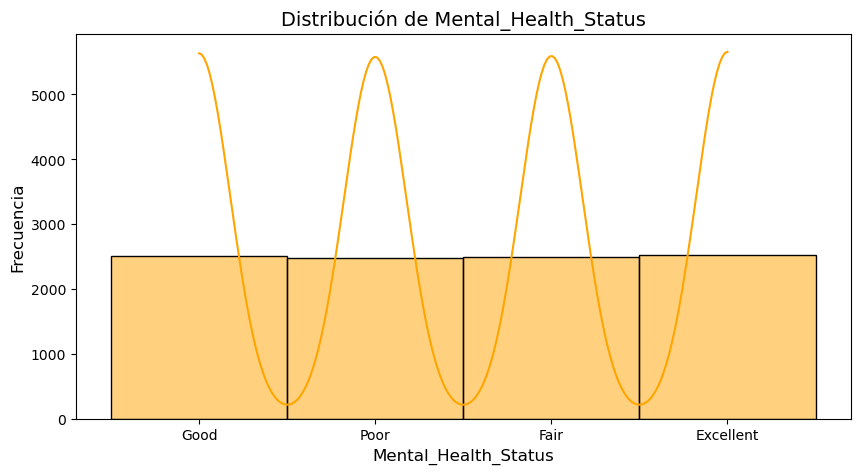

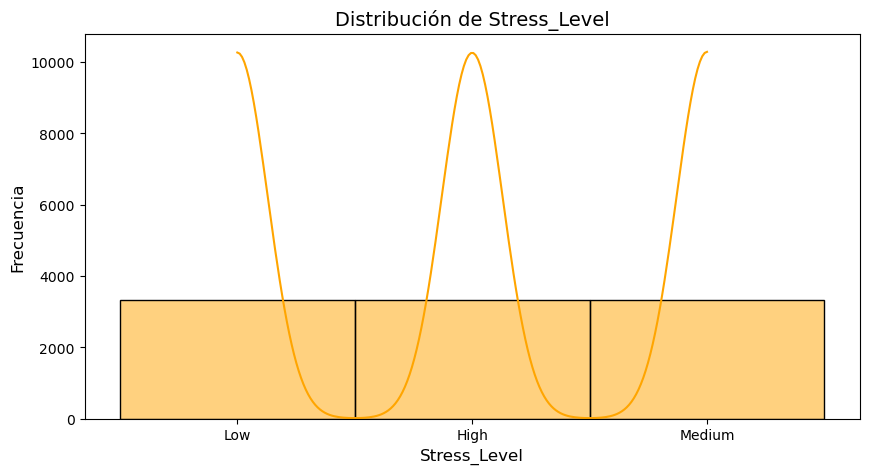

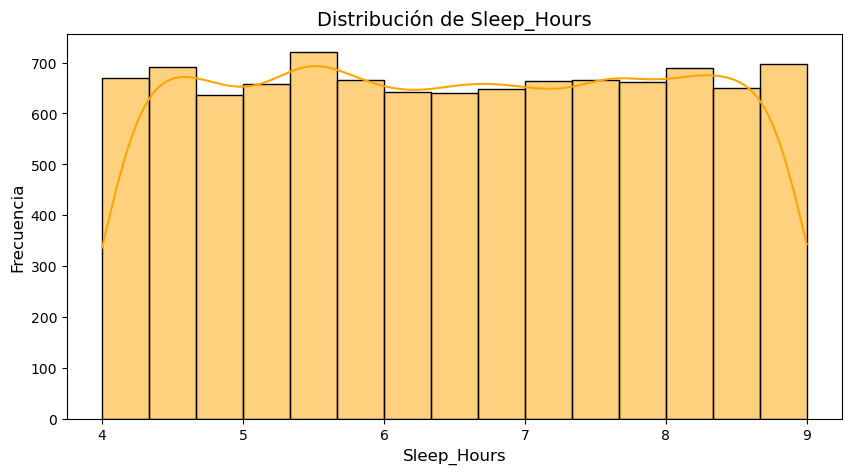

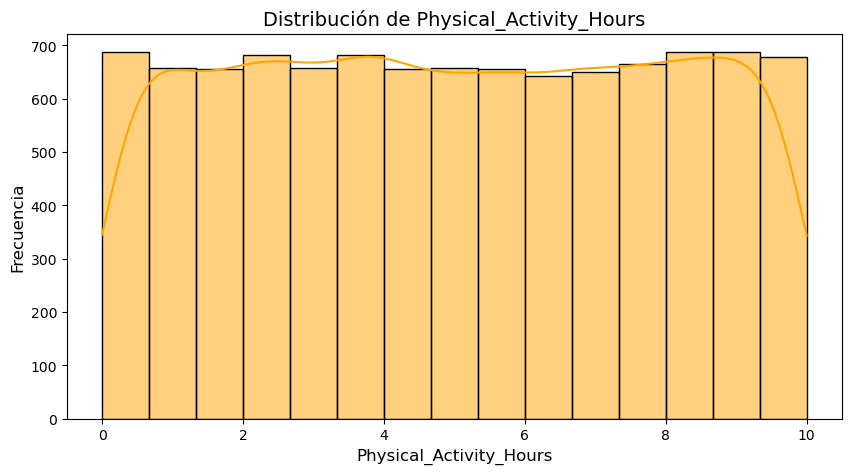

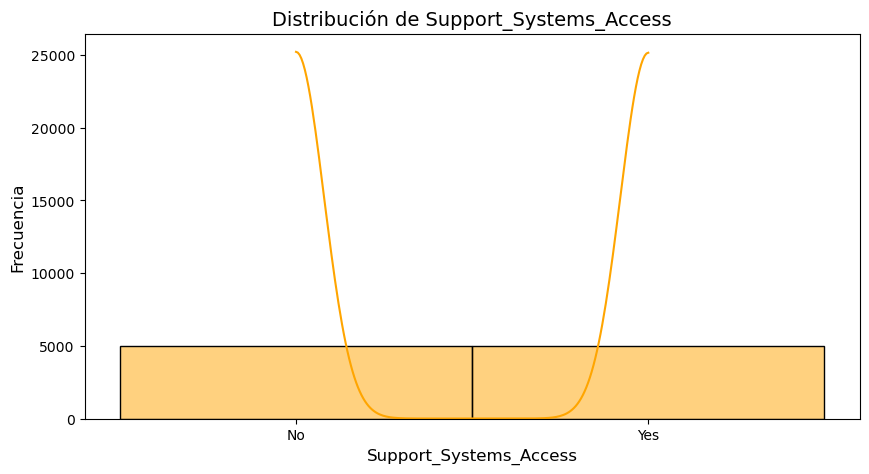

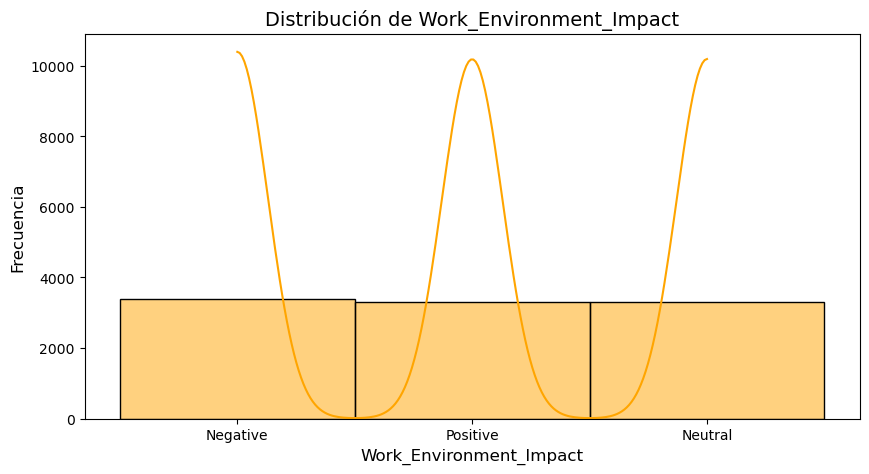

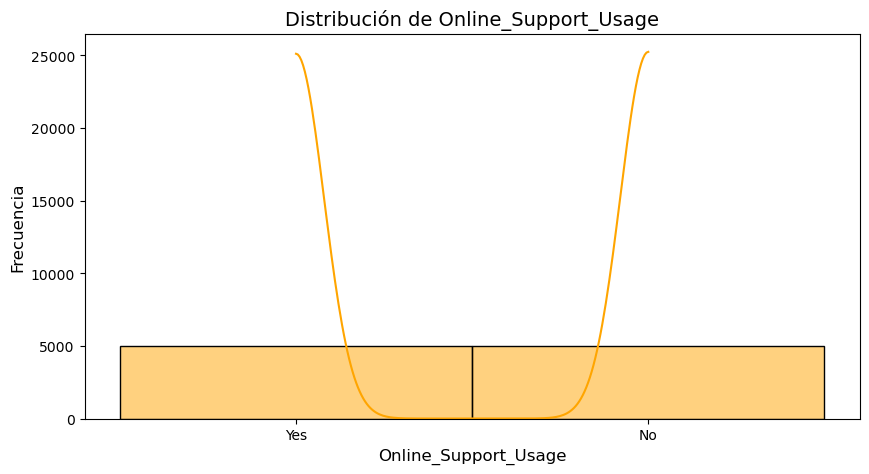

In [16]:
file_path = 'mental_health_and_technology_usage_2024.csv'  
data = pd.read_csv(file_path)

plt.rcParams['figure.figsize'] = (10, 5)  # configuracion de las graficas

# Seleccionar columnas que contienen índices relevantes 
indices_cols = [col for col in data.columns if 
    'Age' in col or 
    'Gender' in col or 
    'Technology_Usage_Hours' in col or 
    'Social_Media_Usage_Hours' in col or 
    'Gaming_Hours' in col or 
    'Screen_Time_Hours' in col or 
    'Mental_Health_Status' in col or 
    'Stress_Level' in col or 
    'Sleep_Hours' in col or 
    'Physical_Activity_Hours' in col or 
    'Support_Systems_Access' in col or 
    'Work_Environment_Impact' in col or 
    'Online_Support_Usage' in col
]

# Generar histogramas
for col in indices_cols:
    plt.figure() 
    sns.histplot(data=data, x=col, kde=True, bins=15, color='Orange')  
    plt.title(f'Distribución de {col}', fontsize=14)  
    plt.xlabel(col, fontsize=12)  
    plt.ylabel('Frecuencia', fontsize=12)  
    plt.show()  


# 5.  Comparativa de uso ente generos & edades #

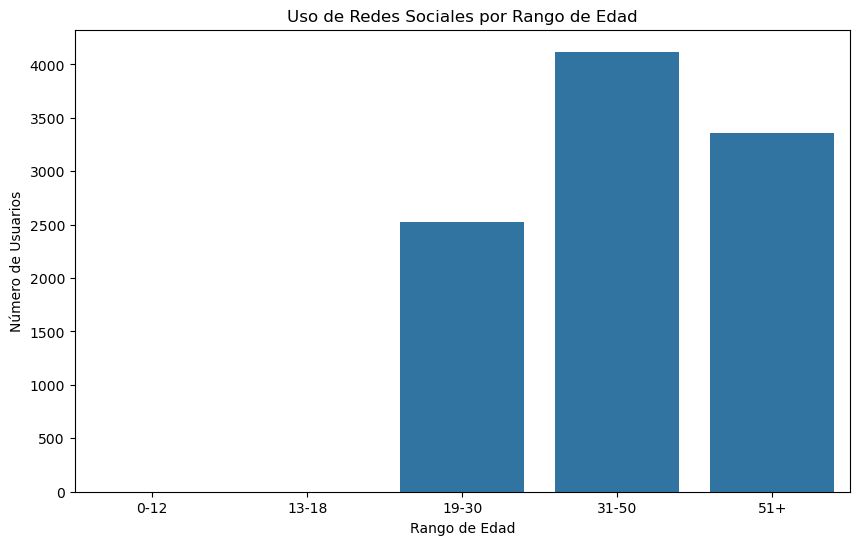

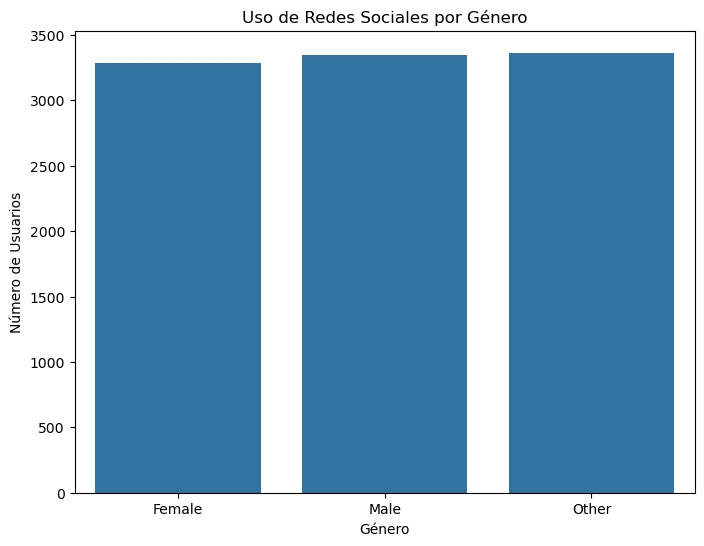

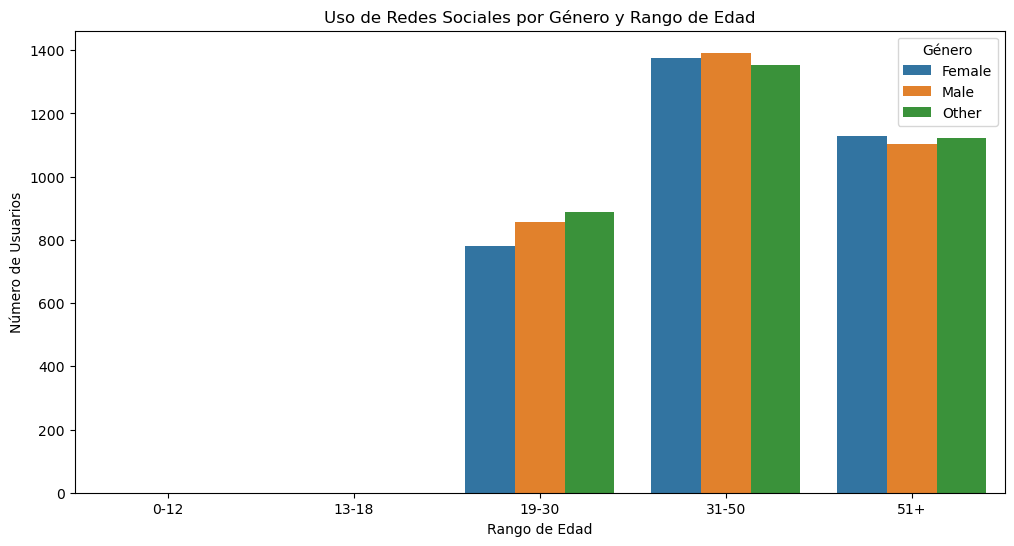

In [18]:
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')

# Crear los bins y labels para las edades
bins = [0, 12, 18, 30, 50, 100]
labels = ['0-12', '13-18', '19-30', '31-50', '51+']

# Crear la columna de rango de edad
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Gráfico 1: Uso de redes sociales por rango de edad
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=df)
plt.title("Uso de Redes Sociales por Rango de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Usuarios")
plt.show()

# Gráfico 2: Uso de redes sociales por género
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title("Uso de Redes Sociales por Género")
plt.xlabel("Género")
plt.ylabel("Número de Usuarios")
plt.show()

# Gráfico 3: Uso de redes sociales por género y rango de edad (gráfico de barras apiladas)
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Gender', data=df)
plt.title("Uso de Redes Sociales por Género y Rango de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Usuarios")
plt.legend(title='Género')
plt.show()

# 6. Analisis columnas a grafico #

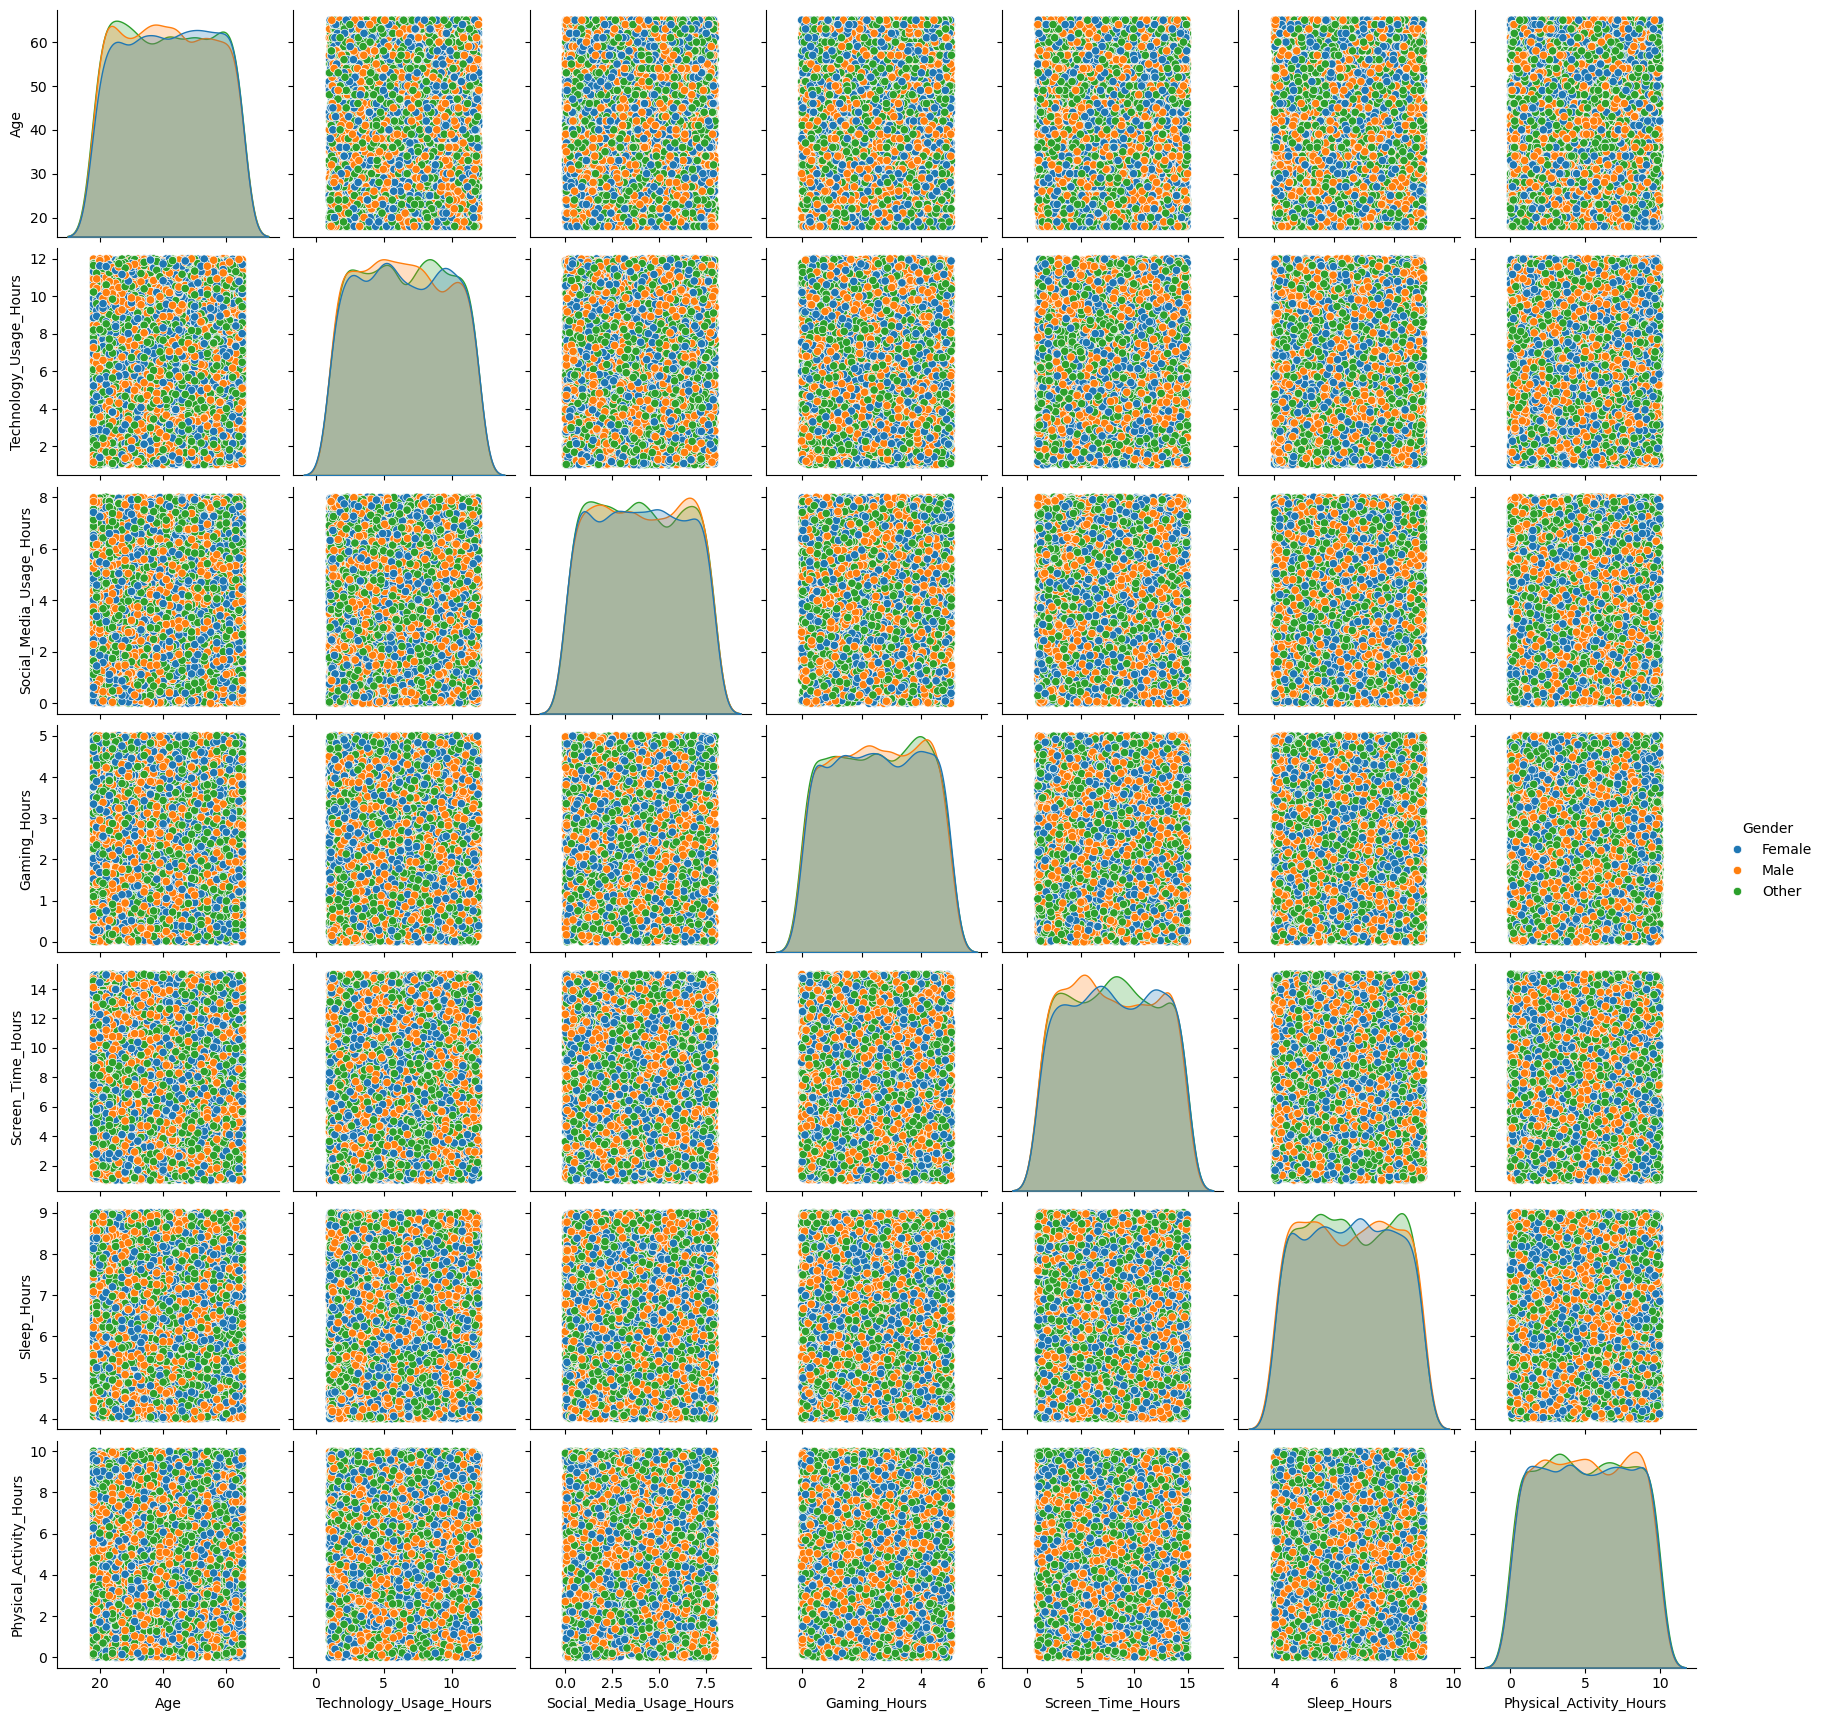

<Figure size 1500x1200 with 0 Axes>

In [20]:
data = pd.read_csv("mental_health_and_technology_usage_2024.csv", encoding='utf-8')

# Seleccionar las columnas relevantes
indices_cols = [col for col in data.columns if 
    'Age' in col or 
    'Gender' in col or 
    'Technology_Usage_Hours' in col or 
    'Social_Media_Usage_Hours' in col or 
    'Gaming_Hours' in col or 
    'Screen_Time_Hours' in col or 
    'Mental_Health_Status' in col or 
    'Stress_Level' in col or 
    'Sleep_Hours' in col or 
    'Physical_Activity_Hours' in col or 
    'Support_Systems_Access' in col or 
    'Work_Environment_Impact' in col or 
    'Online_Support_Usage' in col
]

# Crear la matriz de gráficos de dispersión
sns.pairplot(data[indices_cols], hue='Gender', diag_kind='kde')

# Personalizar el gráfico
plt.figure(figsize=(15, 12))
sns.set_palette("husl")
plt.suptitle("Relaciones entre variables de salud y uso de tecnología", fontsize=16)
plt.show()

# 7. Modelo de regresión lineal #

Error cuadrático medio: 1.2381922683193303


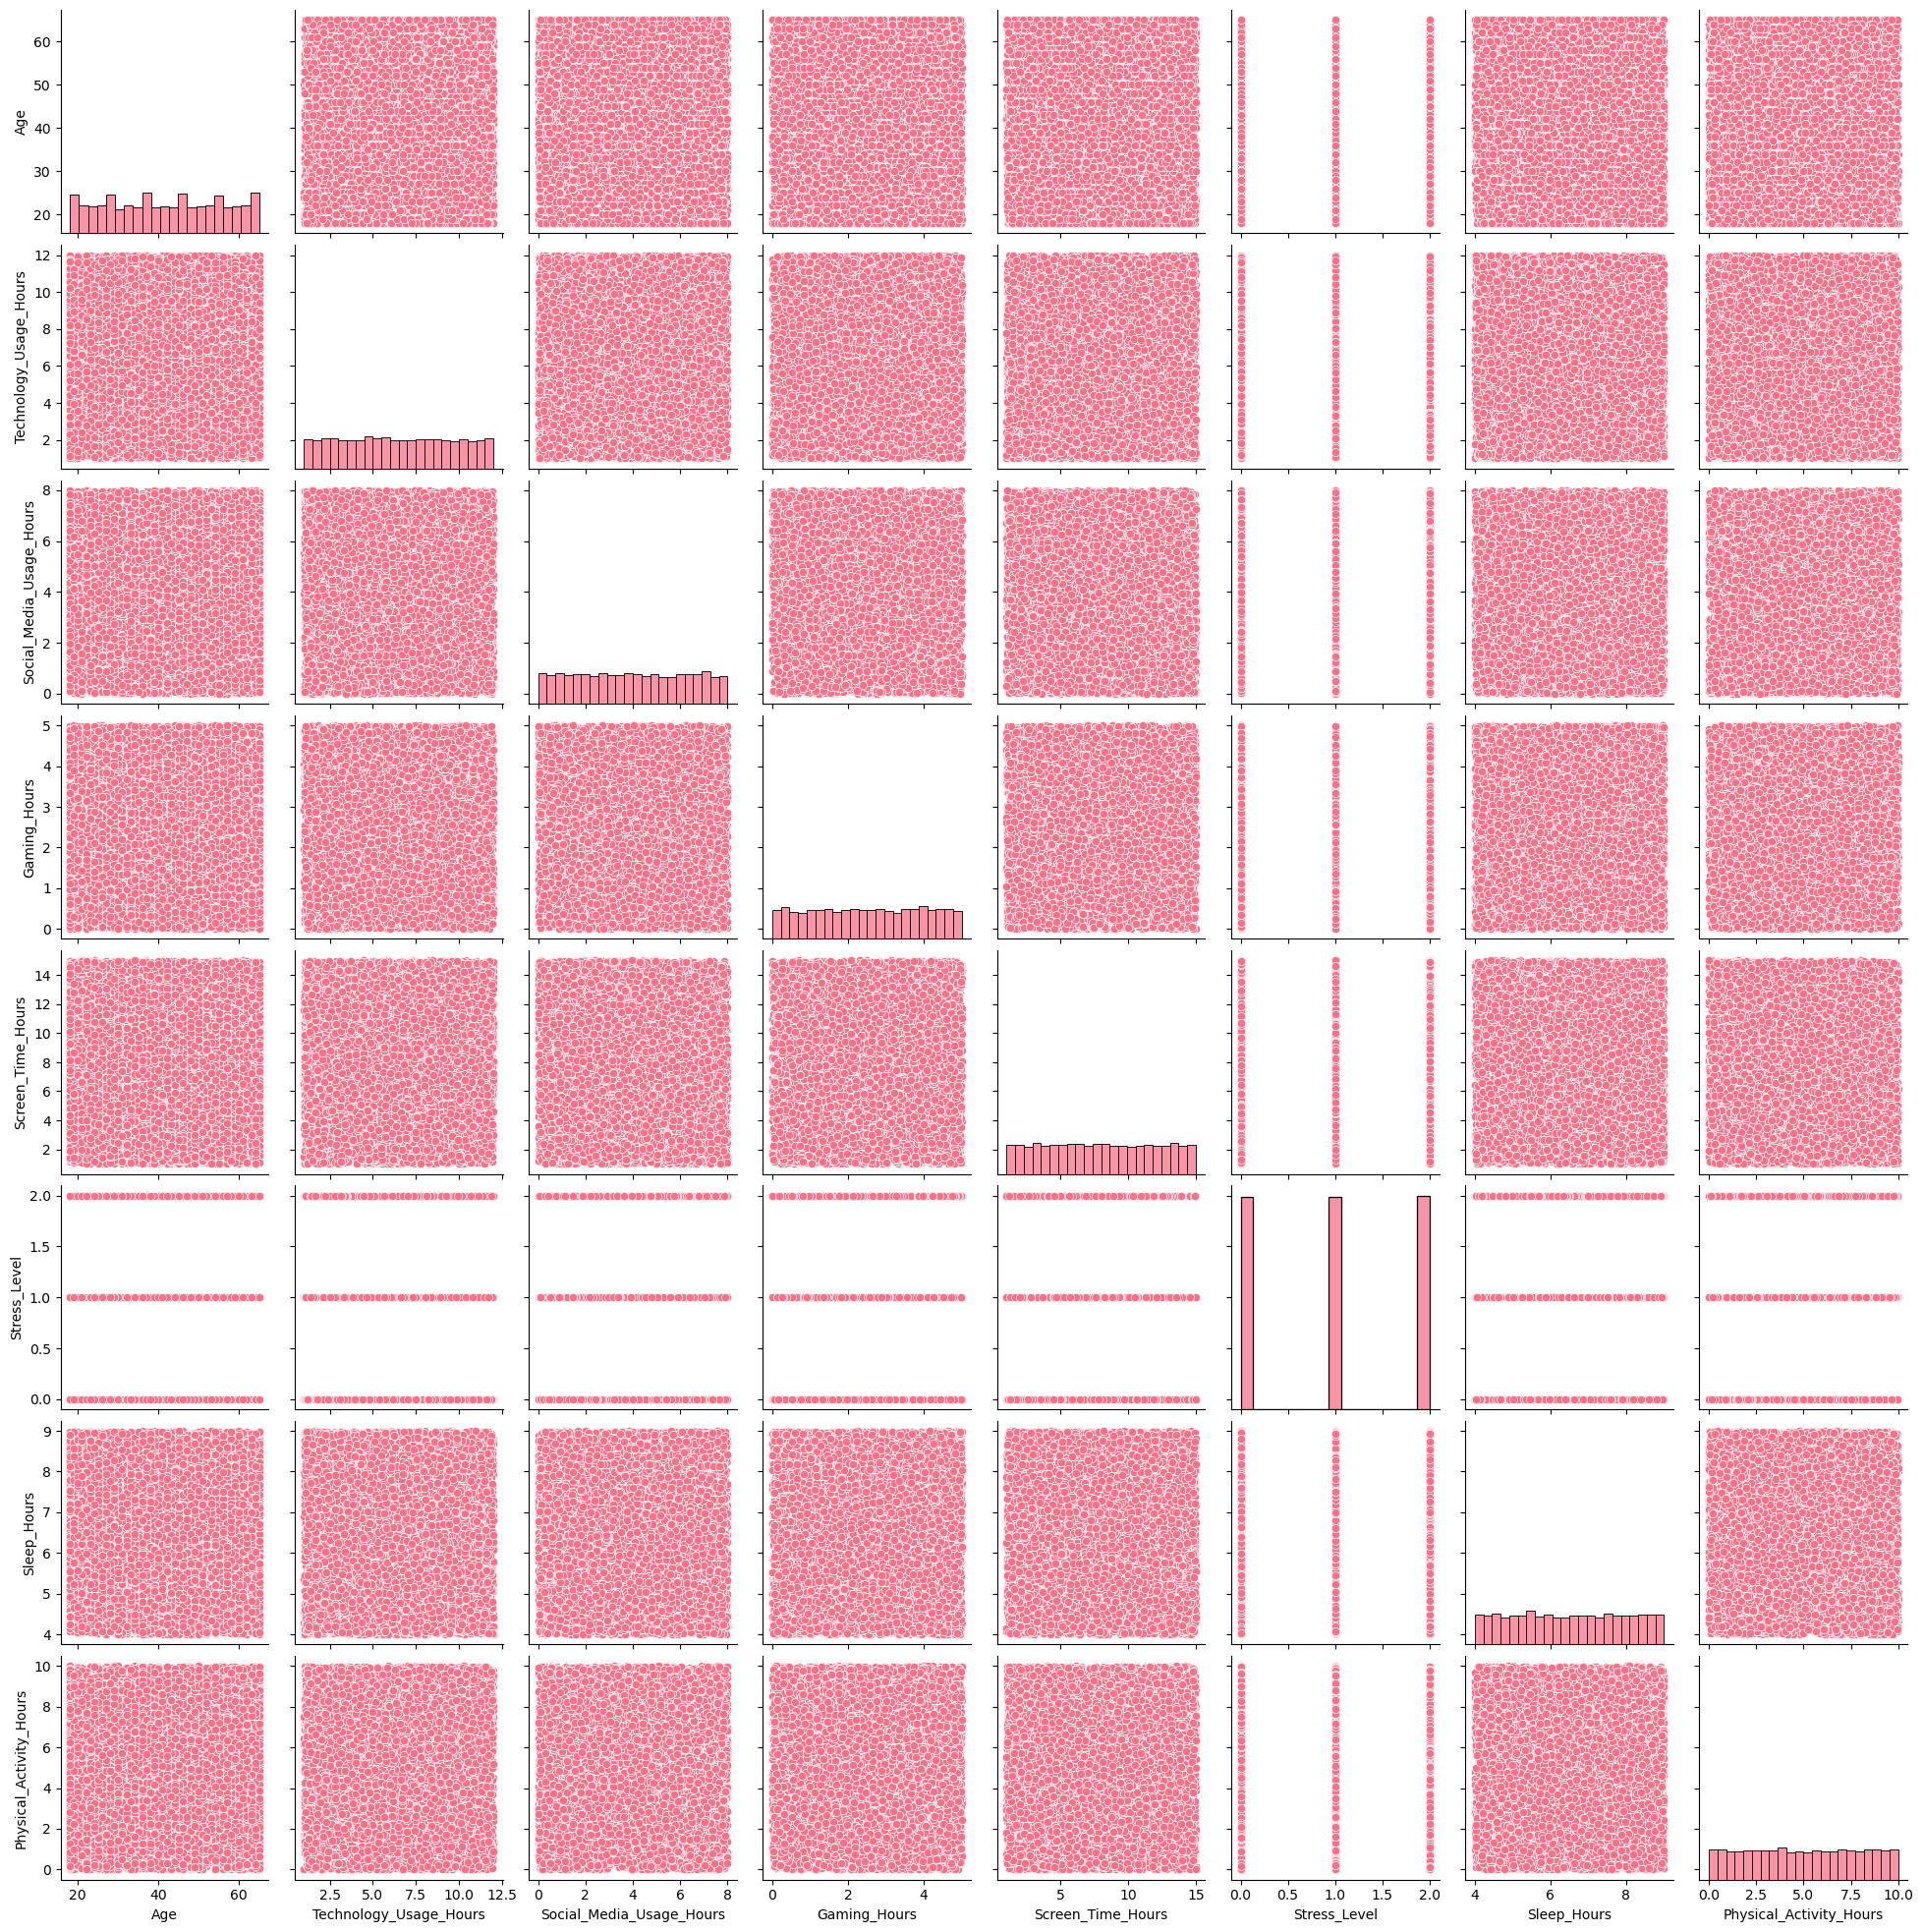

In [22]:
data = pd.read_csv("mental_health_and_technology_usage_2024.csv")

# Identificar columnas categóricas y numéricas
categorical_columns = ['Stress_Level']  # Reemplaza con las columnas categóricas reales
numerical_columns = ['Age', 'Social_Media_Usage_Hours', 'Gaming_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Stress_Level']

# Procesar columnas categóricas
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Seleccionar las columnas de entrada y salida
X = data[numerical_columns + categorical_columns]
y = data['Mental_Health_Status']

# Transformar la salida usando LabelEncoder
y = le.fit_transform(y)

# Escalar las columnas numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)

# Visualizar la relación entre las variables
sns.pairplot(data)
plt.show()


# 8. Matriz de correlación #

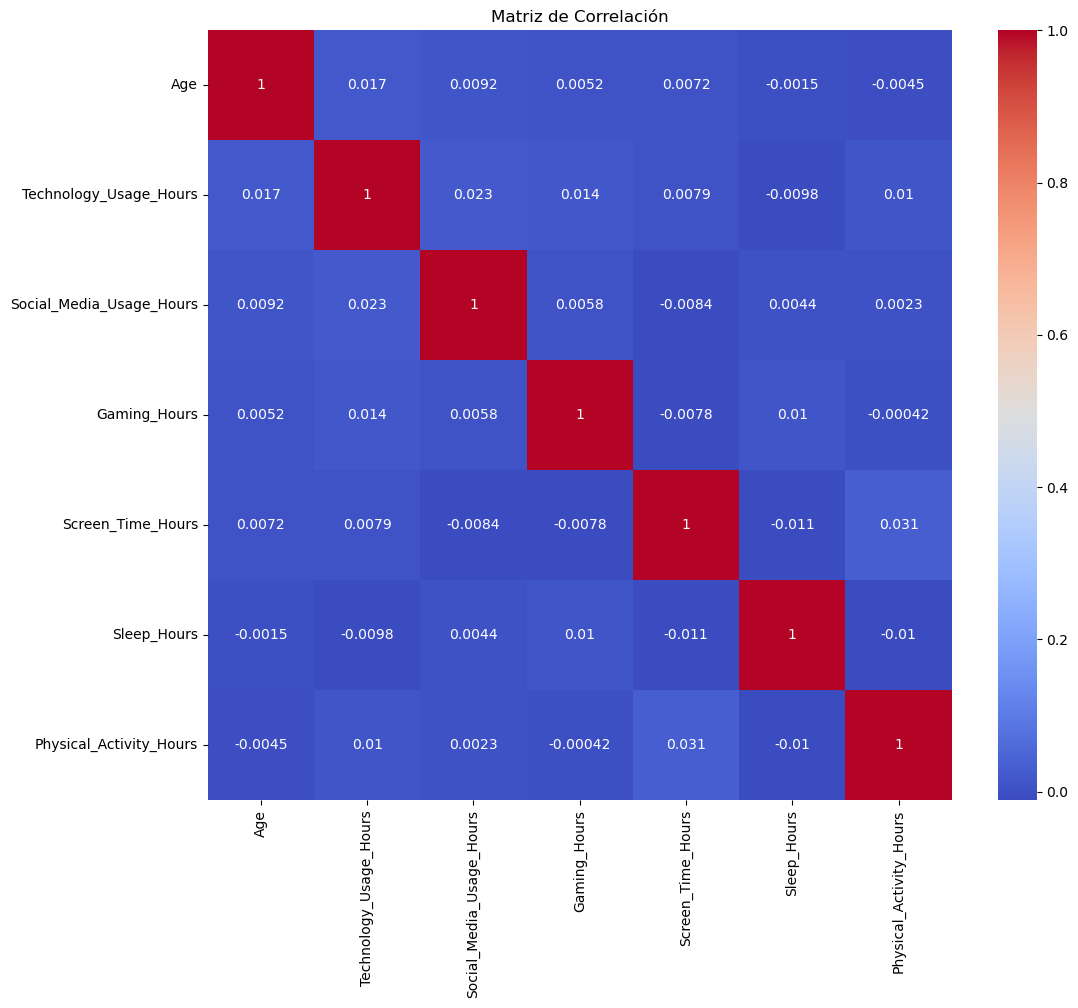

In [24]:
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')

# Seleccionar solo las columnas numéricas (si es necesario)
df_numeric = df.select_dtypes(include=['number'])

# Manejar valores faltantes (opcional)
# df_numeric.fillna(df_numeric.mean(), inplace=True)  # Rellenar con la media

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# 9. Modelo de Machine Learning con regresion lineal # 

Error Cuadrático Medio: 1.2383986012515038
R-cuadrado: 0.00048539043462159093


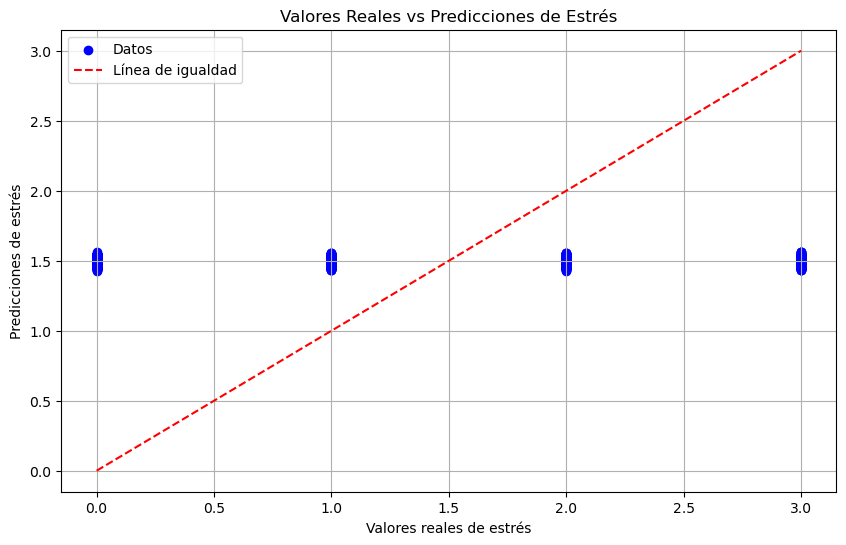

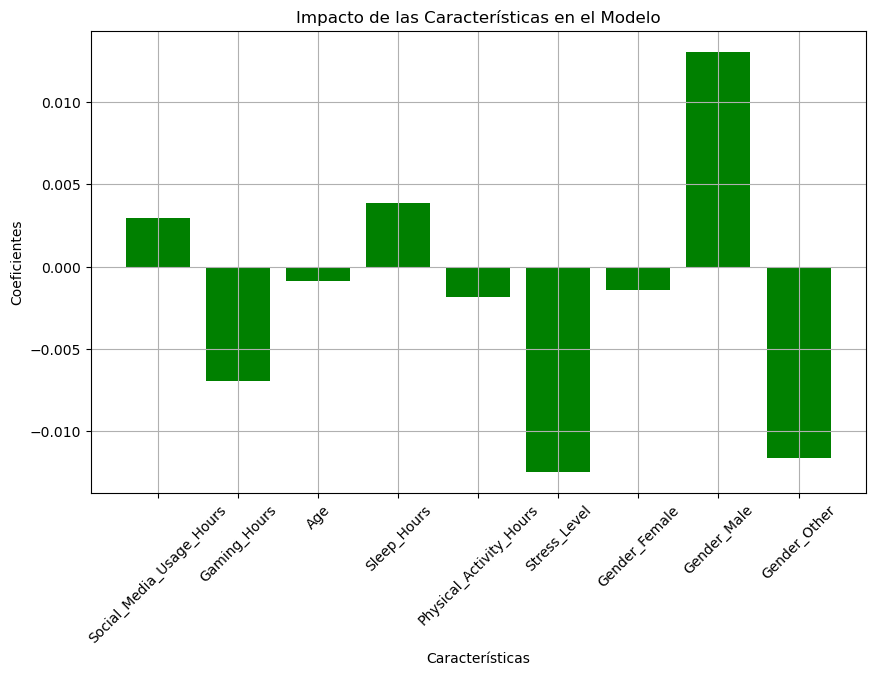

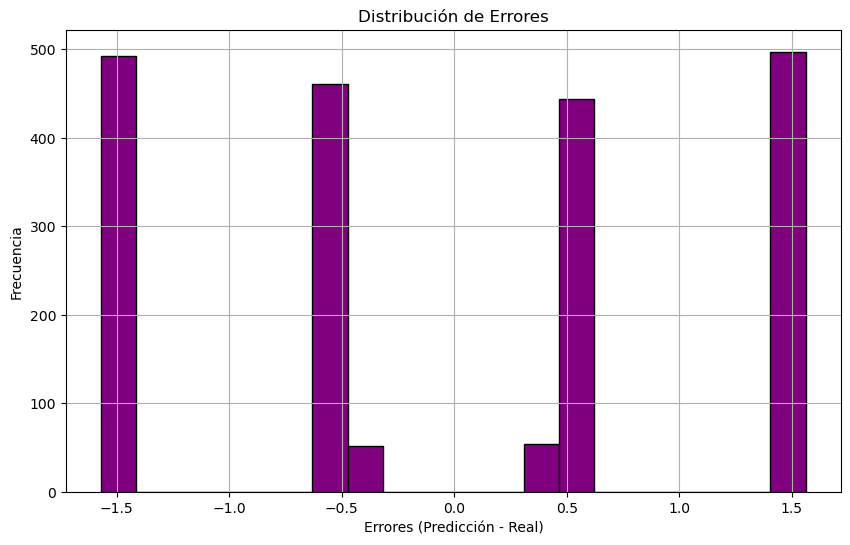

In [26]:
# Cargar el archivo CSV
data = pd.read_csv('mental_health_and_technology_usage_2024.csv')

# 2. Seleccionar las variables relevantes
X = data[['Social_Media_Usage_Hours', 'Gaming_Hours', 'Age', 'Gender', 'Sleep_Hours', 'Physical_Activity_Hours', 'Stress_Level']]
y = data['Mental_Health_Status']

# 3. Asegurarnos de que los nombres de las columnas sean de tipo str
X.columns = X.columns.astype(str)

# 4. Convertir las columnas relevantes a tipo numérico
X.loc[:, ['Social_Media_Usage_Hours', 'Gaming_Hours', 'Age', 'Sleep_Hours', 'Physical_Activity_Hours']] = X[['Social_Media_Usage_Hours', 'Gaming_Hours', 'Age', 'Sleep_Hours', 'Physical_Activity_Hours']].apply(pd.to_numeric, errors='coerce')

# 5. Codificar la variable 'Gender' con One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_gender = encoder.fit_transform(X[['Gender']])

# Concatenar las columnas codificadas y eliminar la original
X_encoded = pd.concat([X.drop('Gender', axis=1), pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['Gender']))], axis=1)

# 6. Codificar la variable 'Stress_Level' con LabelEncoder (convertir a valores numéricos)
label_encoder_stress = LabelEncoder()
X_encoded['Stress_Level'] = label_encoder_stress.fit_transform(X_encoded['Stress_Level'])

# 7. Codificar la variable 'Mental_Health_Status' con LabelEncoder (convertir a valores numéricos)
label_encoder_health = LabelEncoder()
y_encoded = label_encoder_health.fit_transform(y)

# 8. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# 9. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 10. Hacer predicciones
y_pred = model.predict(X_test)

# 11. Evaluar el modelo
# Error Cuadrático Medio (MSE): Cuanto más bajo, mejor
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio:", mse)

# R-cuadrado: Cuanto más alto, mejor (más cercano a 1 indica mejor ajuste)
r2 = r2_score(y_test, y_pred)
print("R-cuadrado:", r2)

# 12. Análisis y visualización de los resultados

# Visualización 1: Graficar los niveles de estrés reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de igualdad')  # Línea de igualdad
plt.xlabel('Valores reales de estrés')
plt.ylabel('Predicciones de estrés')
plt.title('Valores Reales vs Predicciones de Estrés')
plt.legend()
plt.grid(True)
plt.show()

# Visualización 2: Impacto de las características en el modelo
coef_names = list(X_encoded.columns)  # Nombres de columnas de X_encoded
plt.figure(figsize=(10, 6))
plt.bar(coef_names, model.coef_, color='green')
plt.xlabel('Características')
plt.ylabel('Coeficientes')
plt.title('Impacto de las Características en el Modelo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualización 3: Histograma de errores
errors = y_pred - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='purple', edgecolor='black')
plt.xlabel('Errores (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.grid(True)
plt.show()


# 10. Conclusiones y .xlxs final #

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
data = pd.read_csv('mental_health_and_technology_usage_2024.csv')

# Seleccionar las características relevantes
X = data[['Social_Media_Usage_Hours', 'Gaming_Hours', 'Age', 'Gender', 'Sleep_Hours', 'Physical_Activity_Hours', 'Stress_Level']]
y = data['Mental_Health_Status']

# Codificar características categóricas
encoder = OrdinalEncoder(dtype=np.float64)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Social_Media_Usage_Hours', 'Gaming_Hours', 'Age', 'Gender', 'Sleep_Hours', 'Physical_Activity_Hours', 'Stress_Level']]), columns=X.columns)

# Codificar la variable objetivo (asumiendo que es categórica)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mapear los valores predichos a sus etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred.round().astype(int))

# Crear un DataFrame solo con las columnas 'Real' y 'Predicción'
results_df = pd.DataFrame({
    'Real': label_encoder.inverse_transform(y_test),
    'Predicción': y_pred_labels
})

# Guardar los resultados en un archivo Excel
results_df.to_excel('predicciones_salud_mental_regresión_lineal.xlsx', index=False)

# Imprimir conclusiones en consola
print("Conclusiones del Modelo de Regresión Lineal")
print("-----------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"R-cuadrado: {r2:.4f}")

# Análisis adicional:
if r2 > 0.5:
    print("El modelo explica una proporción significativa de la variabilidad en los datos.")
else:
    print("El modelo no explica una proporción significativa de la variabilidad en los datos. Considera explorar otros modelos o características.")

print(f"Se han generado las predicciones de la salud mental. Puedes ver los resultados y compararlos con los valores reales en el archivo 'predicciones_salud_mental_regresión_lineal.xlsx'.")


Conclusiones del Modelo de Regresión Lineal
-----------------------------------------
Error Cuadrático Medio (MSE): 1.2382
R-cuadrado: 0.0006
El modelo no explica una proporción significativa de la variabilidad en los datos. Considera explorar otros modelos o características.
Se han generado las predicciones de la salud mental. Puedes ver los resultados y compararlos con los valores reales en el archivo 'predicciones_salud_mental_regresión_lineal.xlsx'.
